# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt     


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['ushuaia',
 'kapuskasing',
 'taolanaro',
 'wahiawa',
 'norman wells',
 'sri aman',
 'bengkulu',
 'tshikapa',
 'nikolskoye',
 'sayat',
 'castro',
 'sorland',
 'busselton',
 'xinqing',
 'puerto ayora',
 'rio grande',
 'margate',
 'georgetown',
 'unity',
 'askiz',
 'atuona',
 'nizhneyansk',
 'helong',
 'arraial do cabo',
 'poum',
 'tommot',
 'grand gaube',
 'rikitea',
 'popondetta',
 'tiksi',
 'ostersund',
 'akcaabat',
 'qaanaaq',
 'bluff',
 'punta arenas',
 'brae',
 'saleaula',
 'faanui',
 'ostrovnoy',
 'arlit',
 'bindi',
 'fortuna',
 'willowmore',
 'grand river south east',
 'saldanha',
 'albany',
 'lompoc',
 'mao',
 'mataura',
 'paramonga',
 'upernavik',
 'chokurdakh',
 'naze',
 'tsihombe',
 'mochicahui',
 'hobart',
 'kavaratti',
 'ancud',
 'mandali',
 'butaritari',
 'port-gentil',
 'iqaluit',
 'ilulissat',
 'nantucket',
 'henties bay',
 'jalu',
 'koyelga',
 'roma',
 'avarua',
 'llangefni',
 'hilo',
 'nenjiang',
 'khilok',
 'tuatapere',
 'illoqqortoormiut',
 'yellowknife',
 'bambous v

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
counter = 0


for city in cities:
    print("--------------")
    print(f' Processing request of the city {city}') 
    url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
    weather_response = requests.get(url)
    weather_json = weather_response.json()

    try:
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
    except:
        print("city not found. skipping...")
        cloudiness.append('NaN')
        country.append('NaN')
        date.append('NaN')
        humidity.append('NaN')
        lat.append('NaN')
        lng.append('NaN')
        max_temp.append('NaN')
        wind_speed.append('NaN')

--------------
 Processing request of the city ushuaia
--------------
 Processing request of the city kapuskasing
--------------
 Processing request of the city taolanaro
city not found. skipping...
--------------
 Processing request of the city wahiawa
--------------
 Processing request of the city norman wells
--------------
 Processing request of the city sri aman
--------------
 Processing request of the city bengkulu
--------------
 Processing request of the city tshikapa
--------------
 Processing request of the city nikolskoye
--------------
 Processing request of the city sayat
--------------
 Processing request of the city castro
--------------
 Processing request of the city sorland
--------------
 Processing request of the city busselton
--------------
 Processing request of the city xinqing
--------------
 Processing request of the city puerto ayora
--------------
 Processing request of the city rio grande
--------------
 Processing request of the city margate
-------------

--------------
 Processing request of the city kaitangata
--------------
 Processing request of the city sambava
--------------
 Processing request of the city tongliao
--------------
 Processing request of the city yulin
--------------
 Processing request of the city airai
--------------
 Processing request of the city sioux lookout
--------------
 Processing request of the city kaeo
--------------
 Processing request of the city severo-kurilsk
--------------
 Processing request of the city new norfolk
--------------
 Processing request of the city aberystwyth
--------------
 Processing request of the city loudi
--------------
 Processing request of the city la ronge
--------------
 Processing request of the city paamiut
--------------
 Processing request of the city samusu
city not found. skipping...
--------------
 Processing request of the city shache
--------------
 Processing request of the city cabanbanan
--------------
 Processing request of the city tome-acu
city not found. sk

--------------
 Processing request of the city coos bay
--------------
 Processing request of the city olafsvik
--------------
 Processing request of the city batasan
--------------
 Processing request of the city sinnamary
--------------
 Processing request of the city buraydah
--------------
 Processing request of the city bac lieu
--------------
 Processing request of the city basco
--------------
 Processing request of the city clyde river
--------------
 Processing request of the city san andres
--------------
 Processing request of the city algeciras
--------------
 Processing request of the city santa maria del oro
--------------
 Processing request of the city mayo
--------------
 Processing request of the city edd
--------------
 Processing request of the city kirkenes
--------------
 Processing request of the city makakilo city
--------------
 Processing request of the city mackay
--------------
 Processing request of the city egvekinot
--------------
 Processing request of t

--------------
 Processing request of the city kemijarvi
--------------
 Processing request of the city vung tau
--------------
 Processing request of the city kauhajoki
--------------
 Processing request of the city mapiripan
--------------
 Processing request of the city calama
--------------
 Processing request of the city pacific grove
--------------
 Processing request of the city mount gambier
--------------
 Processing request of the city las vegas
--------------
 Processing request of the city akureyri
--------------
 Processing request of the city palabuhanratu
city not found. skipping...
--------------
 Processing request of the city narsaq
--------------
 Processing request of the city kitsuki
--------------
 Processing request of the city ryde
--------------
 Processing request of the city garoua boulai
--------------
 Processing request of the city jiaonan
--------------
 Processing request of the city southbridge
--------------
 Processing request of the city bathurst
---

--------------
 Processing request of the city imeni poliny osipenko
--------------
 Processing request of the city opunake
--------------
 Processing request of the city launceston
--------------
 Processing request of the city santiago del estero
--------------
 Processing request of the city gat
--------------
 Processing request of the city storforshei
--------------
 Processing request of the city neiafu
--------------
 Processing request of the city thunder bay
--------------
 Processing request of the city mahibadhoo
--------------
 Processing request of the city leshukonskoye
--------------
 Processing request of the city santa vitoria do palmar
--------------
 Processing request of the city micheweni
--------------
 Processing request of the city kulhudhuffushi
--------------
 Processing request of the city inhambane
--------------
 Processing request of the city price
--------------
 Processing request of the city liepaja
--------------
 Processing request of the city gamba
-

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_check = pd.DataFrame({'City': cities, 'Cloudiness': cloudiness, 'Country': country, 'Date': date, 'Humidity': humidity, 'Latitude': lat, 'Longitude': lng, 'Max Temp': max_temp, 'Wind Speed': wind_speed})
weather_checkdf = weather_check[weather_check['Date'] != "NaN"]

weather_checkdf

weather_checknew = weather_checkdf.astype({'City': 'str', 'Cloudiness': 'float64', 'Country': 'str', 'Humidity': 'float64', 'Latitude': 'float64', 'Longitude': 'float64', 'Max Temp': 'float64', 'Wind Speed': 'float64'})
weather_checknew.to_csv("Output/WeatherCheck.csv", index=False, header=True)

In [24]:
weather_checknew.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,ushuaia,90.0,AR,1586739333,87.0,-54.80,-68.30,42.80,14.99
1,kapuskasing,90.0,CA,1586739578,55.0,49.42,-82.43,35.60,3.36
3,wahiawa,75.0,US,1586739579,65.0,21.50,-158.02,82.40,4.70
4,norman wells,75.0,CA,1586739579,38.0,65.28,-126.83,39.20,4.70
5,sri aman,75.0,MY,1586739580,94.0,1.24,111.46,78.80,2.19
6,bengkulu,84.0,ID,1586739580,80.0,-3.80,102.27,78.06,4.16
7,tshikapa,99.0,CD,1586739580,82.0,-6.42,20.80,71.74,4.43
8,nikolskoye,90.0,RU,1586739581,87.0,59.70,30.79,42.80,13.42
9,sayat,90.0,TM,1586739581,100.0,38.78,63.88,55.40,4.70
10,castro,22.0,BR,1586739367,68.0,-24.79,-50.01,57.70,6.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

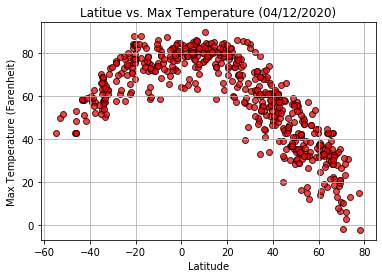

In [25]:
lat = weather_checknew['Latitude']
temp = weather_checknew['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Farenheit)')
plt.title(f'Latitue vs. Max Temperature ({date})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

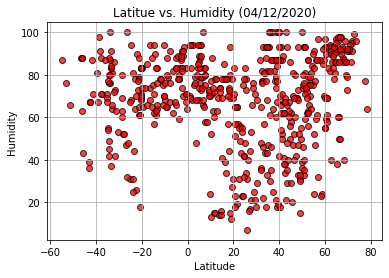

In [26]:
hum = weather_checknew['Humidity']

plt.scatter(lat, hum, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitue vs. Humidity ({date})')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

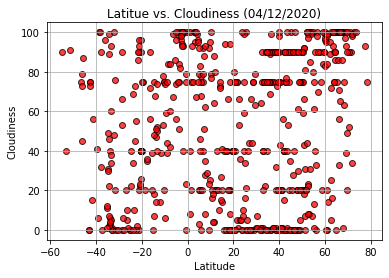

In [27]:
cloud = weather_checknew['Cloudiness']

plt.scatter(lat, cloud, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitue vs. Cloudiness ({date})')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

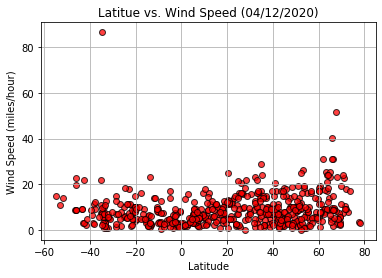

In [28]:
wind = weather_checknew['Wind Speed']

plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles/hour)')
plt.title(f'Latitue vs. Wind Speed ({date})')
plt.grid()
plt.show()

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress


def plotregress(xvalues, yvalues, textloc, ylabel):\
    #xvalues = are the values on the x axis
    #yvalues = are the values on the y axis
    #textloc = locations of the annotation
    # ylabel = the ylabel of the graph
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    plt.plot(xvalues,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, textloc, fontsize=15, color="red")
    plt.ylabel(ylabel) 
    print(f"The r-squared is: {rvalue**2}")

In [42]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_data = weather_checknew[weather_checknew['Latitude'] > 0]
south_weather_data = weather_checknew[weather_checknew['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7961768119556544


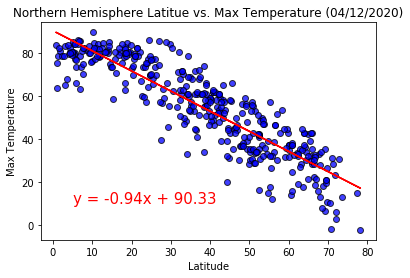

In [47]:
nlat = north_weather_data['Latitude']
ntemp = north_weather_data['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, ntemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Northern Hemisphere Latitue vs. Max Temperature ({date})')
plotregress(nlat, ntemp, (5, 10), 'Max Temperature' )
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.558186824889931


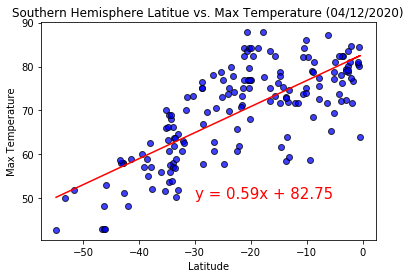

In [45]:
slat = south_weather_data['Latitude']
stemp = south_weather_data['Max Temp']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, stemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Southern Hemisphere Latitue vs. Max Temperature ({date})')
plotregress(slat, stemp, (-30, 50), 'Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.035680069581299205


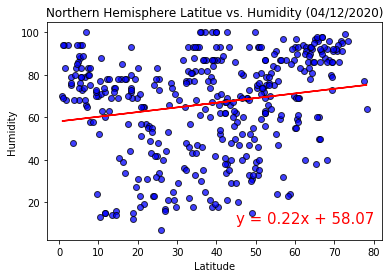

In [49]:
nhum = north_weather_data['Humidity']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, nhum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Northern Hemisphere Latitue vs. Humidity ({date})')
plotregress(nlat, nhum, (45, 10) , 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03315398639138103


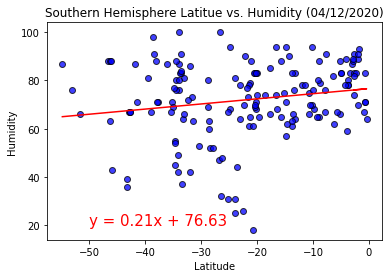

In [51]:
shum = south_weather_data['Humidity']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, shum, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere Latitue vs. Humidity ({date})')
plotregress(slat, shum, (-50, 20), 'Humidity' )
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05484876808018973


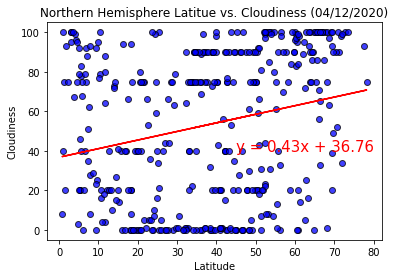

In [53]:
ncloud = north_weather_data['Cloudiness']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, ncloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Northern Hemisphere Latitue vs. Cloudiness ({date})')
plotregress(nlat, ncloud, (45, 40), 'Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0859033847418595


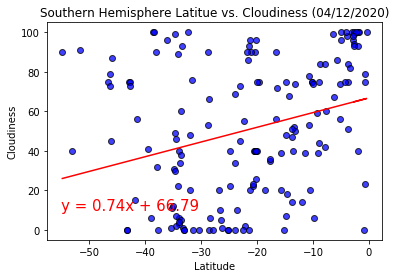

In [54]:
scloud = south_weather_data['Cloudiness']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, scloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Southern Hemisphere Latitue vs. Cloudiness ({date})')
plotregress(slat, scloud, (-55, 10), 'Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05364744326592832


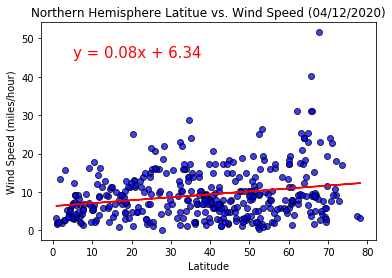

In [56]:
nlat = north_weather_data['Latitude']
nwind = north_weather_data['Wind Speed']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(nlat, nwind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Northern Hemisphere Latitue vs. Wind Speed ({date})')
plotregress(nlat, nwind, (5, 45), 'Wind Speed (miles/hour)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05630303712465248


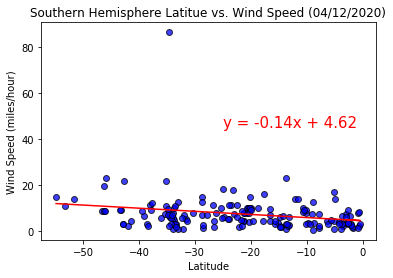

In [58]:
swind = south_weather_data['Wind Speed']
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.scatter(slat, swind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Latitude')
plt.title(f'Southern Hemisphere Latitue vs. Wind Speed ({date})')
plotregress(slat, swind, (-25, 45), 'Wind Speed (miles/hour)')
plt.show()